# 3.3.4 Challenge:  Advanced Regression - Crime Data

__Goal:__ Engineer features and create three models: 1. Vanilla logistic regression. 2. Ridge logistic regression. 3. Lasso logistic regression.  Evaluate the models and decide on the best model for the dataset. 

__Source:__ Colorado crime data from 2013 as provided by ([the FBI: UCR](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_colorado_by_city_2013.xls)

In [1]:
#necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Cleaning Data

In [2]:
#read in data
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_colorado_by_city_2013.xls', header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Arvada,110792.0,163.0,0.0,33.0,NaN,34.0,96.0,2666.0,331.0,2138.0,197.0,22.0
1,Aspen,6685.0,14.0,0.0,5.0,NaN,0.0,9.0,314.0,17.0,286.0,11.0,0.0
2,Ault,1565.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0,2.0,0.0
3,Aurora,343484.0,1436.0,23.0,224.0,NaN,468.0,721.0,10786.0,1981.0,7805.0,1000.0,80.0
4,Avon,6336.0,9.0,0.0,3.0,NaN,0.0,6.0,140.0,12.0,124.0,4.0,1.0


__Data Set Description:__ This data set includes city populations for all cities in Colorado.  For each city, the following information is also reported: number of violent crimes reported in the city, number of murders, rapes, robberies, aggravated assault, property crimes, burglaries, larceny-thefts, motor vehicle thefts, and arson. 

In [3]:
print(len(df))
df.isnull().sum()

137


City                                        0
Population                                  2
Violent\ncrime                              2
Murder and\nnonnegligent\nmanslaughter      2
Rape\n(revised\ndefinition)1                2
Rape\n(legacy\ndefinition)2               137
Robbery                                     2
Aggravated\nassault                         2
Property\ncrime                             2
Burglary                                    2
Larceny-\ntheft                             2
Motor\nvehicle\ntheft                       2
Arson                                       2
dtype: int64

Because the legacy definition of rape was revised in 2013, all instances of rape were recorded in the revised definition count. For this reason, we can drop the column containing the legacy definition.

In [4]:
#dropping the legacy definition of rape
df = df.drop('Rape\n(legacy\ndefinition)2', axis=1)
df.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
132,Woodland Park,7185.0,10.0,0.0,2.0,0.0,8.0,195.0,11.0,179.0,5.0,2.0
133,Wray,2373.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,0.0,0.0
134,Yuma,3563.0,2.0,0.0,1.0,0.0,1.0,16.0,1.0,14.0,1.0,0.0
135,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In inspecting the tail of the data set, the last two rows contain summary information, and can be dropped.  This will remove 100% of the missing values.

In [5]:
#dropping NA values
df = df.dropna()

### Exploring the Data

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


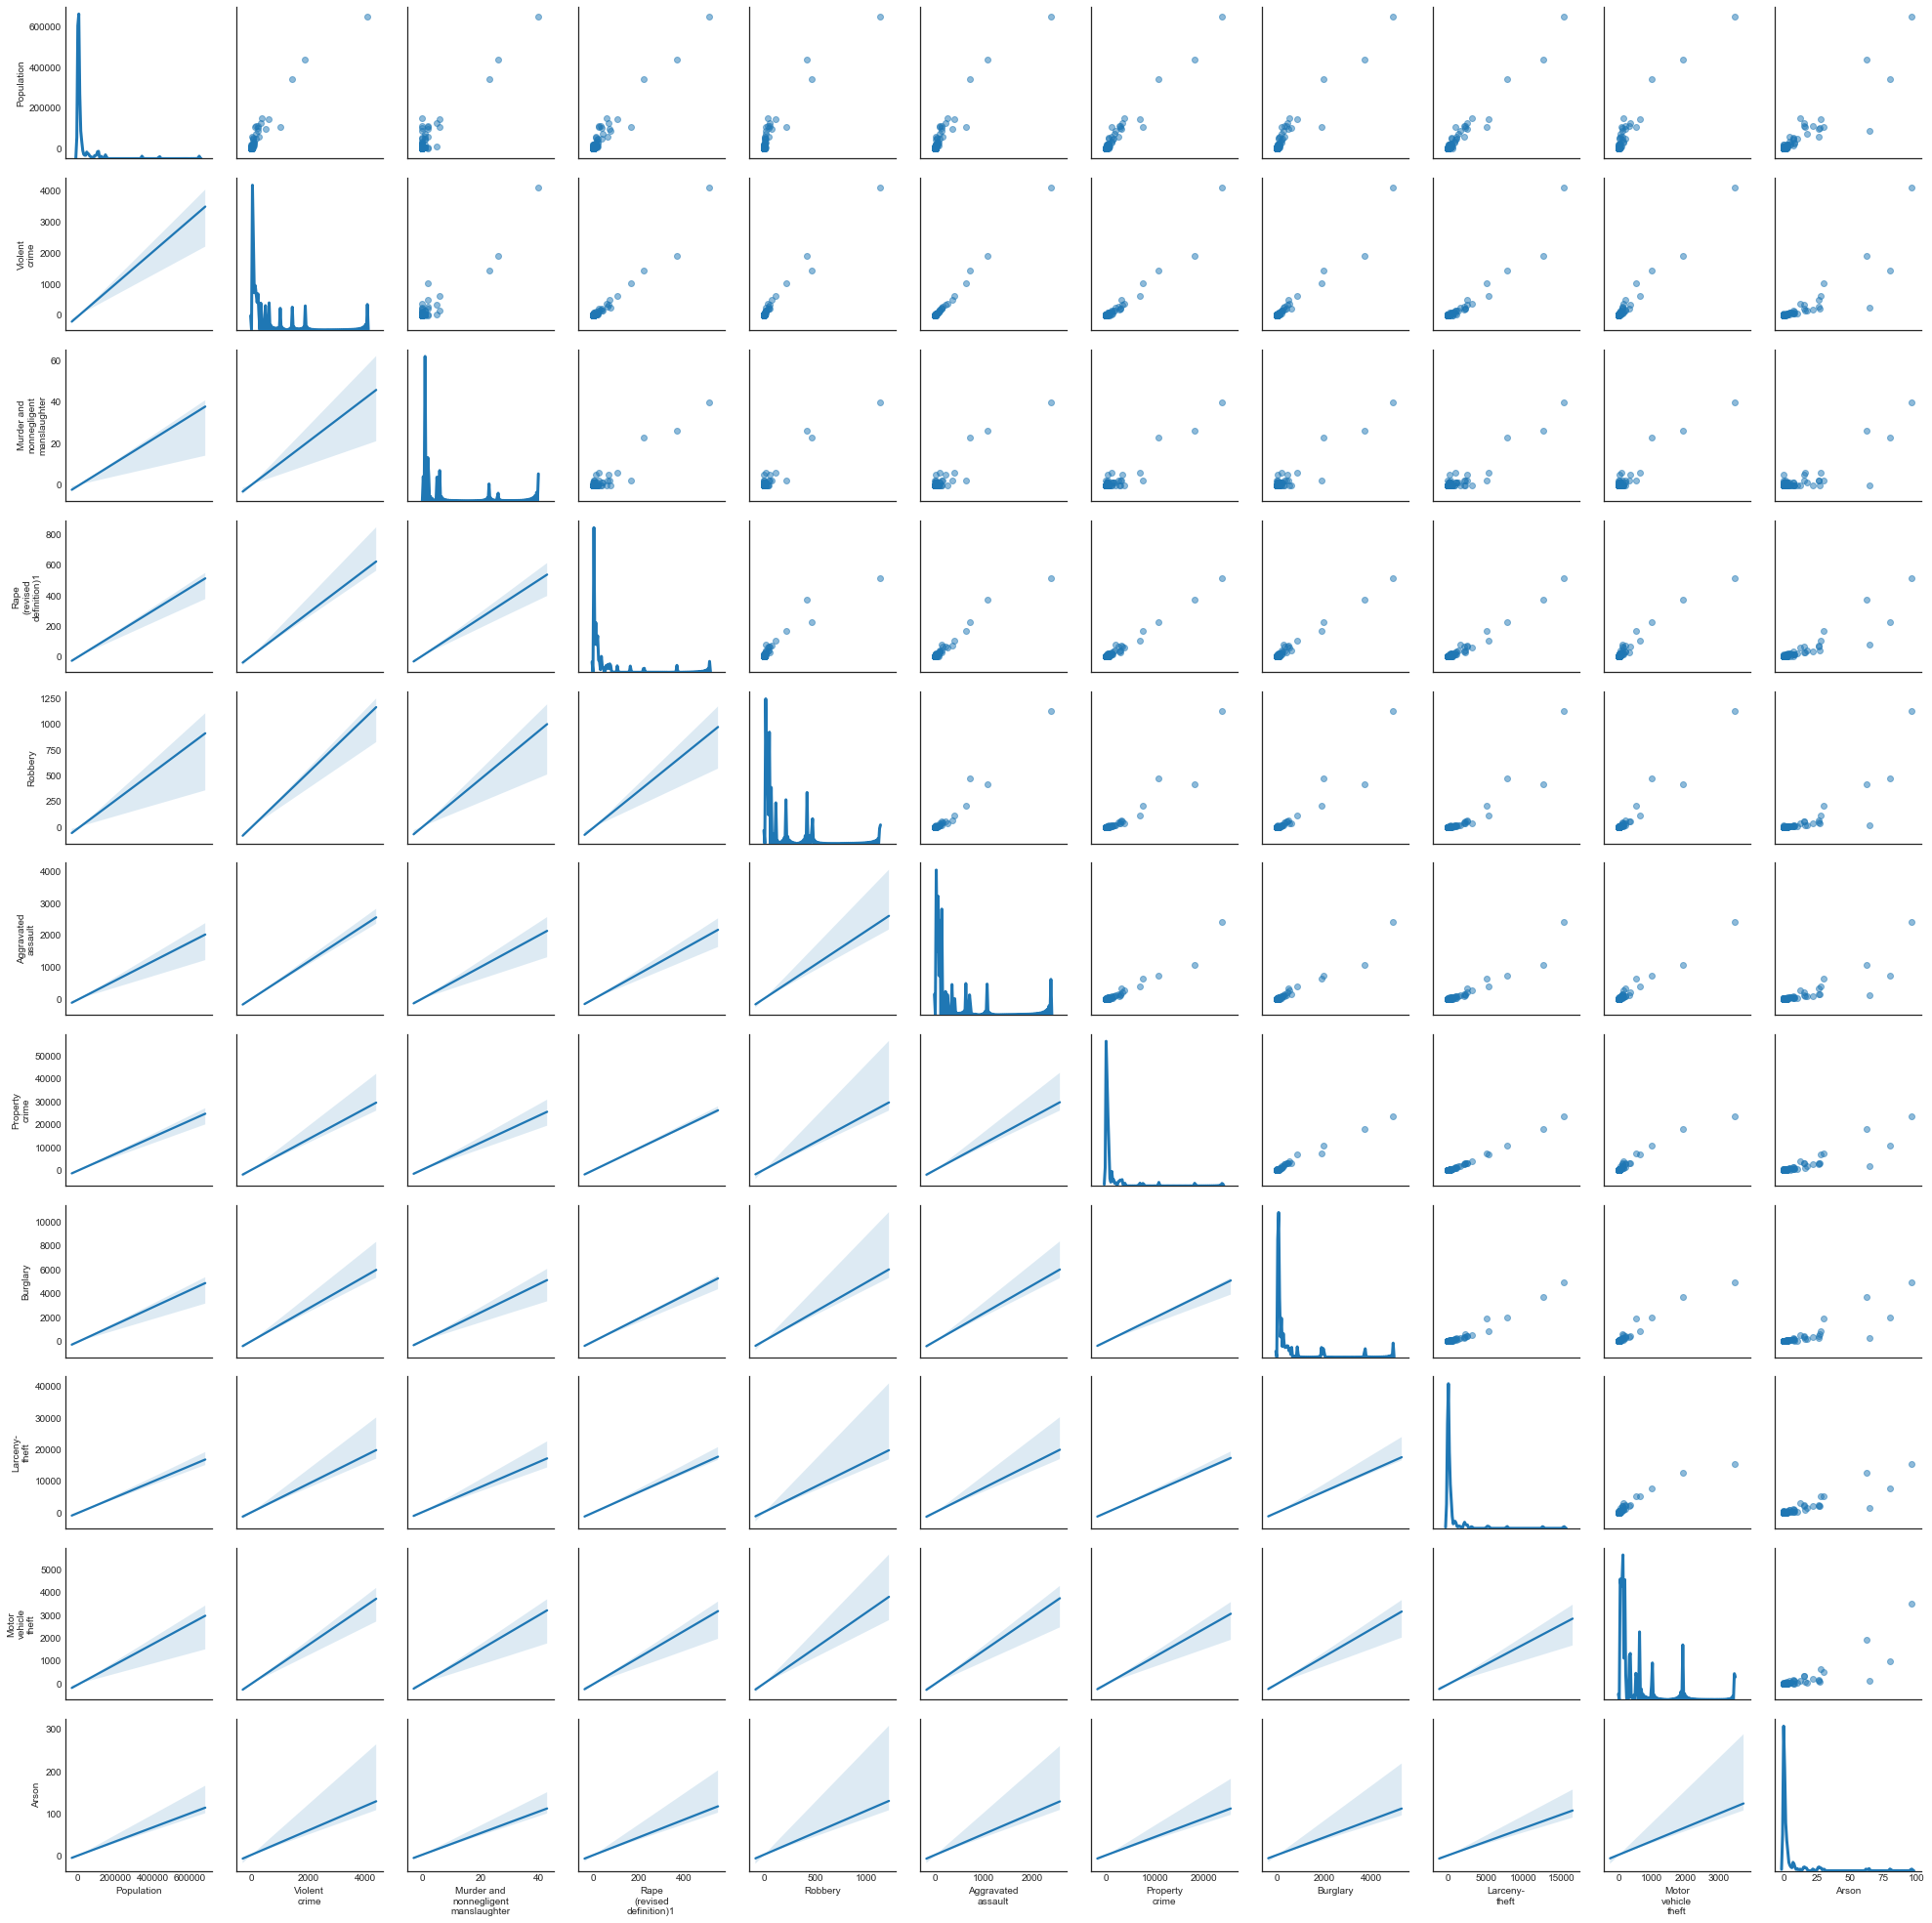

In [6]:
sns.set_style('white')

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

From these scatter plots and lines of linear regression, it is clear that there is a large number of cities with crime counts around zero, and the populations of cities are also clustered around lower counts with a small number of larger cities.  The data also shows that cities with larger populations have larger counts of other crimes. 

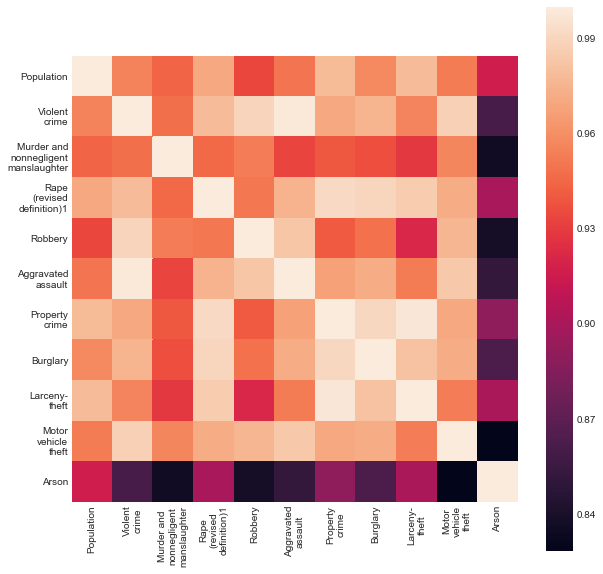

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
Population,1.000000,0.955509,0.943857,0.970261,0.933657,0.950147,0.978446,0.958378,0.978807,0.952703,0.916691
Violent\ncrime,0.955509,1.000000,0.948151,0.978862,0.989855,0.998320,0.970560,0.975267,0.955814,0.987394,0.860894
Murder and\nnonnegligent\nmanslaughter,0.943857,0.948151,1.000000,0.945837,0.953402,0.933379,0.940282,0.936824,0.928407,0.956460,0.836128
Rape\n(revised\ndefinition)1,0.970261,0.978862,0.945837,1.000000,0.951520,0.974564,0.991829,0.990488,0.985384,0.972026,0.900030
Robbery,0.933657,0.989855,0.953402,0.951520,1.000000,0.982893,0.940553,0.948940,0.921530,0.976445,0.838057
Aggravated\nassault,0.950147,0.998320,0.933379,0.974564,0.982893,1.000000,0.967515,0.972114,0.952820,0.984418,0.851383
Property\ncrime,0.978446,0.970560,0.940282,0.991829,0.940553,0.967515,1.000000,0.991075,0.997622,0.969868,0.890076
Burglary,0.958378,0.975267,0.936824,0.990488,0.948940,0.972114,0.991075,1.000000,0.981455,0.971962,0.862739
Larceny-\ntheft,0.978807,0.955814,0.928407,0.985384,0.921530,0.952820,0.997622,0.981455,1.000000,0.953465,0.900130
Motor\nvehicle\ntheft,0.952703,0.987394,0.956460,0.972026,0.976445,0.984418,0.969868,0.971962,0.953465,1.000000,0.828402


In [7]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, square=True)
plt.show()

corrmat

It is clear that there is a good amount of correlation between the different variables.  This is to be expected because violent crime and property crime are both calculated based on the number of respective types of crime.  The only varible that is somewhat independent is arson. 

### Feature Engineering
In accordance with the data exploration, larger populations have larger counts of other crimes, which makes sense.  In other reports of crime, it is customary to report crimes per capita, so I will make that feature and examine that data.

In [8]:
#creating a data frame to hold per 1000 residents features by city
df_per_cap = pd.DataFrame()
df_per_cap['City'] = df['City']

for col in df.drop(['City', 'Population'], axis=1):
    df_per_cap[col] = df[col]/df['Population']*1000

df_per_cap.head()

,City,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Arvada,1.471225,0.000000,0.297855,0.306881,0.866489,24.063109,2.987580,19.297422,1.778107,0.198570
1,Aspen,2.094241,0.000000,0.747943,0.000000,1.346298,46.970830,2.543007,42.782349,1.645475,0.000000
2,Ault,0.000000,0.000000,0.000000,0.000000,0.000000,1.277955,0.000000,0.000000,1.277955,0.000000
3,Aurora,4.180690,0.066961,0.652141,1.362509,2.099079,31.401754,5.767372,22.723038,2.911344,0.232908
4,Avon,1.420455,0.000000,0.473485,0.000000,0.946970,22.095960,1.893939,19.570707,0.631313,0.157828


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


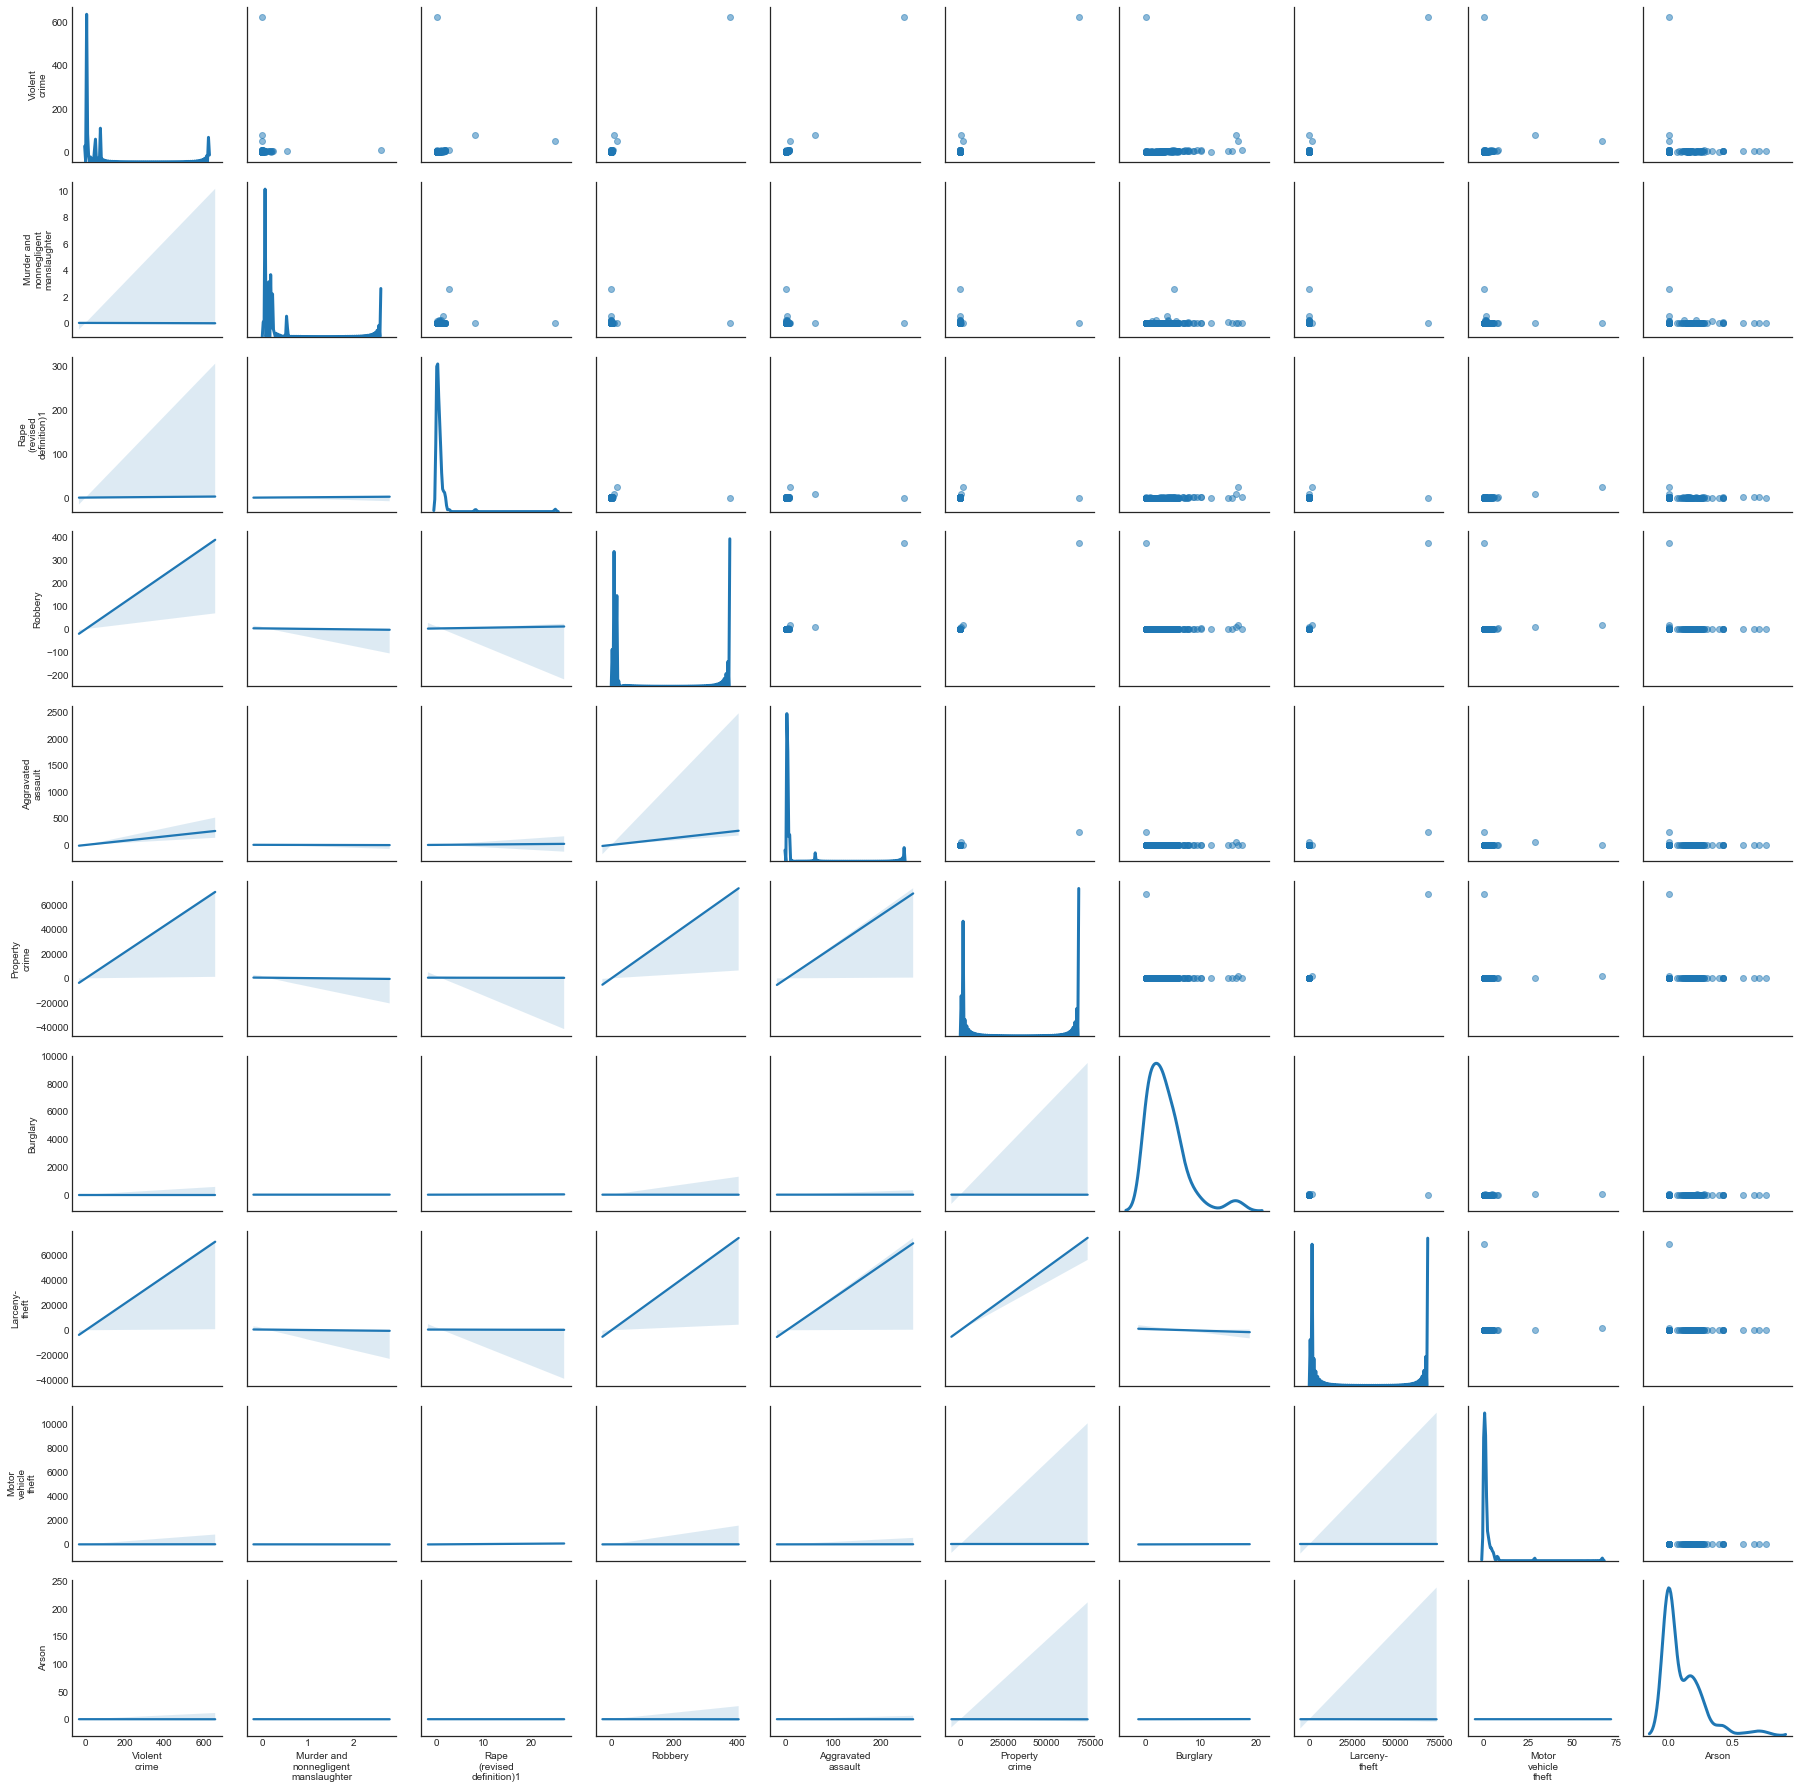

In [9]:
g = sns.PairGrid(df_per_cap, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

This transformation evens out the data to eliminate some of the correlation between variables and turns outliers into more usable information. 

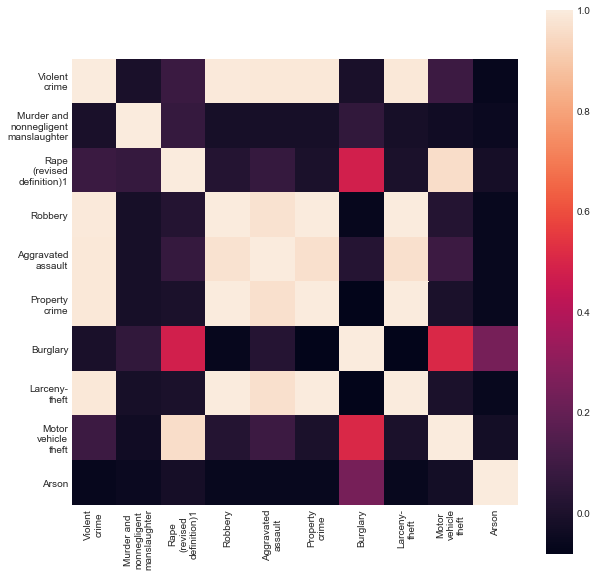

,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
Violent\ncrime,1.000000,-0.008944,0.085545,0.993964,0.991177,0.990888,-0.006379,0.990742,0.091329,-0.060207
Murder and\nnonnegligent\nmanslaughter,-0.008944,1.000000,0.070911,-0.015294,-0.017358,-0.014130,0.059598,-0.014132,-0.031058,-0.047778
Rape\n(revised\ndefinition)1,0.085545,0.070911,1.000000,0.022380,0.072684,-0.001981,0.478370,-0.003299,0.960068,-0.021363
Robbery,0.993964,-0.015294,0.022380,1.000000,0.974129,0.999520,-0.061973,0.999480,0.023114,-0.059761
Aggravated\nassault,0.991177,-0.017358,0.072684,0.974129,1.000000,0.969795,0.024824,0.969631,0.091035,-0.057607
Property\ncrime,0.990888,-0.014130,-0.001981,0.999520,0.969795,1.000000,-0.080142,0.999999,-0.003054,-0.059708
Burglary,-0.006379,0.059598,0.478370,-0.061973,0.024824,-0.080142,1.000000,-0.081283,0.506474,0.247669
Larceny-\ntheft,0.990742,-0.014132,-0.003299,0.999480,0.969631,0.999999,-0.081283,1.000000,-0.004432,-0.059826
Motor\nvehicle\ntheft,0.091329,-0.031058,0.960068,0.023114,0.091035,-0.003054,0.506474,-0.004432,1.000000,-0.026217
Arson,-0.060207,-0.047778,-0.021363,-0.059761,-0.057607,-0.059708,0.247669,-0.059826,-0.026217,1.000000


In [10]:
#Create correlation matrix to plot heatmap of crimes per capita
plt.figure(figsize=(10,10))
corrmat_per_cap = df_per_cap.corr()
sns.heatmap(corrmat_per_cap, square=True)
plt.show()
corrmat_per_cap

The variables that are no longer strongly correlated to one another are: murder, arson, rape, and motor vehicle theft. I will add those to our features to then model.

Variables that are still highly correlated are: violent crime, property crime (both of which are to be expected as they are the summary variables), robbery, aggravated assault, and larceny.  

In [11]:
#creating features data frame and loading features
features = pd.DataFrame()
features['City'] = df_per_cap['City']
features['Murder_pc'] = df_per_cap['Murder and\nnonnegligent\nmanslaughter']
features['Arson_pc'] = df_per_cap['Arson']
features['Rape_pc'] = df_per_cap['Rape\n(revised\ndefinition)1']
features['MV_theft_pc'] = df_per_cap['Motor\nvehicle\ntheft']

In [12]:
#combining related features
features['Robbery*Larceny'] = df_per_cap['Robbery'] * df_per_cap['Larceny-\ntheft']
features['Robbery*AggAssault'] = df_per_cap['Robbery'] * df_per_cap['Aggravated\nassault']
features['AggAssault*Larceny'] = df_per_cap['Aggravated\nassault'] * df_per_cap['Larceny-\ntheft']

In [13]:
#Creating binary target variable, where if there is one or more murders, the value is 1, if none, 0.
features['Murder_cat'] = df['Murder and\nnonnegligent\nmanslaughter'].map(lambda x: 1 if x > 0 else 0)

In [14]:
features.Murder_cat.value_counts()

0    111
1     24
Name: Murder_cat, dtype: int64

There are 111 cities in this Colorado data set that had zero murders in 2013, and 24 cities that had one or more murders. 

In [15]:
# creating intercept column
features['intercept'] = 1

y = features['Murder_cat']
X = features.drop(['Murder_cat', 'City'], axis=1)

#creating train and test variables
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

# Modeling
## Vanilla Logistic Regression

In [16]:
#declare and fit the model
lr = LogisticRegression(C=10)

fit = lr.fit(X_train, y_train)

#print accuracy rate
print(X_train.columns)
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X_train)

print('\n Accuracy by Murder Occurrences')
print(pd.crosstab(pred_y, y_train))

print('\n Percentage Accuracy')
print(lr.score(X_train, y_train))

Index(['Murder_pc', 'Arson_pc', 'Rape_pc', 'MV_theft_pc', 'Robbery*Larceny',
       'Robbery*AggAssault', 'AggAssault*Larceny', 'intercept'],
      dtype='object')
Coefficients
[[ 3.69442624e-06 -1.55691611e-05 -7.60775215e-05 -1.89591715e-04
  -8.49087784e-04 -3.35904944e-05 -6.18471586e-03 -2.66101506e-04]]
[-0.0002661]

 Accuracy by Murder Occurrences
Murder_cat   0   1
row_0             
0           87  14

 Percentage Accuracy
0.8613861386138614


Using vanilla logistic regression, the accuracy of the model for the training set was 86%. Oddly, there weren't any predictions of cities that would have one or more murders.  

Is this a problem with the training set (there aren't enough occurrences of murders in the cities)? 

In [17]:
#Using model to predict test set
y_pred_test = lr.predict(X_test)

print('\n Accuracy by Murder Occurrences')
print(pd.crosstab(y_pred_test, y_test))

print('\n Percentage Accuracy')
print(lr.score(X_test, y_test))


 Accuracy by Murder Occurrences
Murder_cat   0   1
row_0             
0           24  10

 Percentage Accuracy
0.7058823529411765


The model was able to predict the test set with 70% accuracy, so not as well as the training set, but as to be expected. 

## Ridge Regression

In [18]:
#initializing and fitting ridge regression model
ridgeregr = Ridge(alpha=0.25, fit_intercept=True)
ridgeregr.fit(X_train, y_train)

#determining accuracy of the training set
print('Accuracy')
print(ridgeregr.score(X_train, y_train))
print('Coefficients')
print(ridgeregr.coef_)

Accuracy
0.3543968364925887
Coefficients
[ 2.01450304e+00  4.92512739e-01 -4.44958856e-02  5.21208645e-02
 -2.71985304e-04 -7.36777281e-03  4.48312040e-04  0.00000000e+00]


The Ridge Regression model was only 35% accurate for the training data set. Not very good.

QUESTION: Since I didn't standardize the data, I had the model fit the intercept.  Was this the correct move?

In [19]:
#predicting accuracy based on test data
print('Accuracy')
print(ridgeregr.score(X_test, y_test))

Accuracy
-1.985141030685468


What does a negative accuracy mean? That where the model was increasing, the data was actually decreasing? Or lower than predicted?

## 